In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 

In [2]:
data = pd.read_csv('insurance.csv')

#Label encoding for the sex and smoker feature
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
data['sex']=number.fit_transform(data['sex'].astype('str'))
data['smoker']=number.fit_transform(data['smoker'].astype('str'))

In [3]:
#One Hot encoding for the region feature
#Drop the region feature and append 4 new features
regions = pd.get_dummies(data['region'])
data[['northeast','northwest','southeast','southwest']]=regions[['northeast','northwest','southeast','southwest']]
data = data.drop('region',axis=1)
data.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [4]:
#Standardization of the data
from sklearn.preprocessing import StandardScaler
data[['age','sex','bmi','children','smoker','charges','northeast','northwest','southeast','southwest']] = StandardScaler().fit_transform(data[['age','sex','bmi','children','smoker','charges','northeast','northwest','southeast','southwest']])

Y = data.charges
X = data.drop('charges',axis=1)
print(X,Y)

           age       sex       bmi  children    smoker  northeast  northwest  \
0    -1.438764 -1.010519 -0.453320 -0.908614  1.970587  -0.565267  -0.566418   
1    -1.509965  0.989591  0.509621 -0.078767 -0.507463  -0.565267  -0.566418   
2    -0.797954  0.989591  0.383307  1.580926 -0.507463  -0.565267  -0.566418   
3    -0.441948  0.989591 -1.305531 -0.908614 -0.507463  -0.565267   1.765481   
4    -0.513149  0.989591 -0.292556 -0.908614 -0.507463  -0.565267   1.765481   
...        ...       ...       ...       ...       ...        ...        ...   
1333  0.768473  0.989591  0.050297  1.580926 -0.507463  -0.565267   1.765481   
1334 -1.509965 -1.010519  0.206139 -0.908614 -0.507463   1.769076  -0.566418   
1335 -1.509965 -1.010519  1.014878 -0.908614 -0.507463  -0.565267  -0.566418   
1336 -1.296362 -1.010519 -0.797813 -0.908614 -0.507463  -0.565267  -0.566418   
1337  1.551686 -1.010519 -0.261388 -0.908614  1.970587  -0.565267   1.765481   

      southeast  southwest  
0     -0.6

In [5]:
#Splitting the data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,random_state=0)

In [6]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

[1.78705917e-01 1.54605325e-01 8.32951311e-02 1.40194292e-01
 9.71265541e-02 1.23440697e-01 1.17215057e-01 1.05417027e-01
 1.55807232e-16]


Text(0, 0.5, 'Cumulative explained variance')

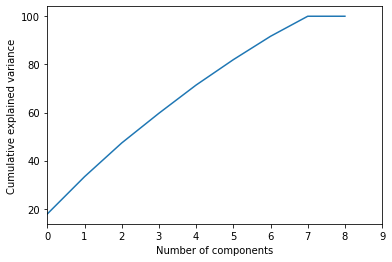

In [24]:
# Calculating Eigenvectors and eigenvalues of Cov matirx
X_std=X_train
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i],i) for i in range(len(eig_vals))]
print(eig_vals/sum(eig_vals))

# Sort the eigenvalue, eigenvector pair from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance
plt.plot(cum_var_exp)
plt.xlim(0,9,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [8]:
# Find the eigenvector beyond which 90% of the data is explained
[ n for n,i in enumerate(cum_var_exp) if i>90 ][0]

6

In [9]:
# Call the PCA method with 6 components. 
pca = PCA(n_components=6)
pca.fit(X_std)
X_6d = pca.transform(X_std)

In [10]:
print(X_6d)

[[ 1.27820423 -0.2022667  -0.27871163  0.25140661 -1.14292918  0.93509487]
 [-1.27797958 -0.89681984  1.75120036 -1.2823557  -1.18230023  0.02348738]
 [-1.16135303  1.65849337 -0.05089703  1.63861345  0.1153053  -0.71966161]
 ...
 [ 1.12056604 -0.4994026  -0.06390613  0.74087161 -0.42497401 -0.97214284]
 [-0.38567793 -1.07747779 -1.54525996  0.81634265 -0.1736808  -1.38897908]
 [-1.80070806  1.63109724 -0.13245344  0.72366175 -0.83198263  0.75724679]]


In [11]:
# Call the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor as RFR

regressor = RFR(n_estimators = 500)

regressor.fit(X_6d, Y_train)   

RandomForestRegressor(n_estimators=500)

In [12]:
#Testing the RFR with PCA
test_6d = pca.transform(X_test)
output_predictions = regressor.predict(test_6d)

In [13]:
#Calculating Accuracy using R2 score and RMSE value
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(Y_test,output_predictions))
print(mean_squared_error(Y_test,output_predictions)**0.5)

0.7385061955061644
0.5300275950652381


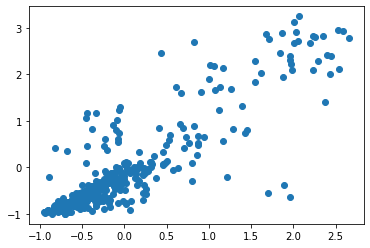

In [14]:
# Output Predictions Vs Actual Charges
plt.scatter(output_predictions,Y_test)

In [15]:
#Most significant feature are age,sex,children,northeast,northwest,southeast

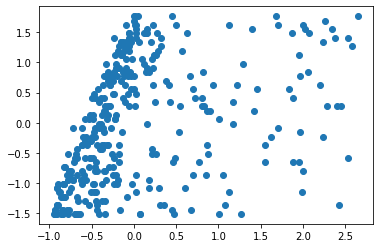

In [16]:
# Output Predictions Vs age
plt.scatter(output_predictions,X_test['age'])

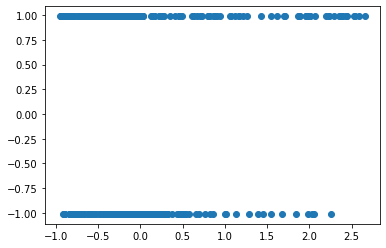

In [17]:
# Output Predictions Vs sex
plt.scatter(output_predictions,X_test['sex'])

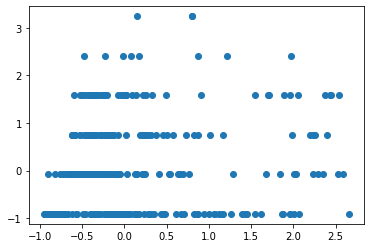

In [19]:
# Output Predictions Vs children
plt.scatter(output_predictions,X_test['children'])

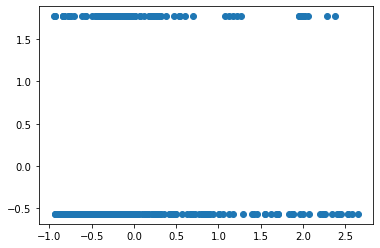

In [20]:
# Output Predictions Vs northeast
plt.scatter(output_predictions,X_test['northeast'])

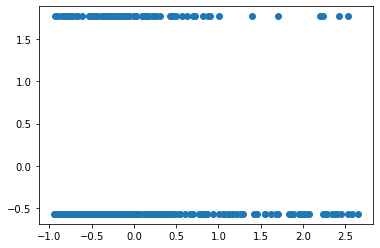

In [21]:
# Output Predictions Vs northwest
plt.scatter(output_predictions,X_test['northwest'])

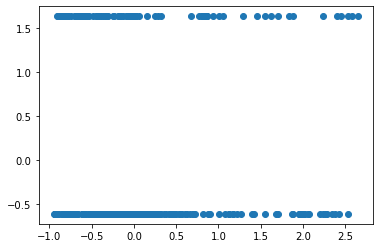

In [22]:
# Output Predictions Vs southeast
plt.scatter(output_predictions,X_test['southeast'])